# **SESSION 5 PRACTICAL APPLICATION OF LINEAR REGRESION**
============================================================================================================================================
- Date: 08/02/2023
- Student: Pablo Ostos Bollmann
- Professor: Pablo Gervás
- Master: MCSBT

============================================================================================================================================

# **UNIVARIATE** -> home.csv


We start by importing the neccessary libraries 

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
 

We need to load the desired dataset we want to analyse and we normalise the features by using the mean normalisation.
Replace with to make features have approximately zero mean.
We can also display the dataset and see what we are working with. 

In [106]:
my_data = pd.read_csv('home.csv',names=["size","bedroom","price"])
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


**Setting the matrixes:** We create the matriz "Xsize" and "Xbedroom" with all the inputs, where we adapt the code to run on a single variable, in this case "size". And a vector "y" with all the outputs. For convenience of the notation we create a vector of "ones" that we will define as x0 = 1.

Let's divide the problem for the two variables we want to isolate which are size and bedroom 

In [107]:
size = my_data.iloc[:,0:1]
bedroom = my_data.iloc[:,1:2]

ones = np.ones([size.shape[0],1])
Xsize = np.concatenate((ones,size),axis=1)
Xbedroom = np.concatenate((ones, bedroom), axis=1)

y = my_data.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,2])

If we want to plot the data of data + prediction we have to take the "size" vector we assigned. 

### **size + prediction plot**

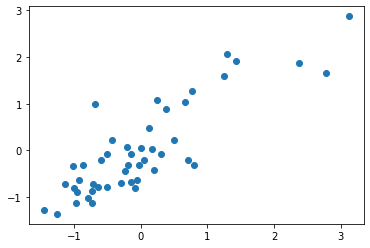

In [108]:
size = size.values
plt.scatter(size, y)
plt.show()

### **bedroom + prediction plot**

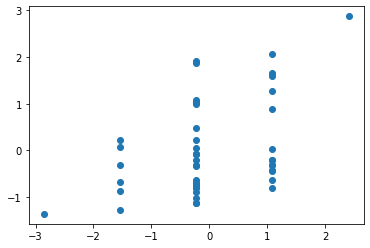

In [109]:
bedroom = bedroom.values
plt.scatter(bedroom, y)
plt.show()

This plotting of the bedroom variable against the price shows us pretty important information: first we can see, as logic would say, that the number of bedrooms is a discrete event in houses, since we can find 1, 2, 3... bedrooms in a house. Another thing we can highlight is that this variable will probably be less interesting for the prediction. 

This function calculates the cost for our problem 

In [110]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

The gradient descent function iterates a certain number of times (iters) to calculate theta and the cost for each iteration. In each iteration the function "computeCost" is called to calculate the cost for each theta. 

In [111]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

Now we can set our parameters for our functions, which are the LEARNING RATE (alpha) and the NO. OF ITERATIONS (iters)

In [112]:
alpha = 0.01
iters = 1000

Now we can proceed and play with our parameters to see how they affect our prediction

## **Prediction with size variable**

In [113]:
g,cost = gradientDescent(Xsize,y,theta,iters,alpha)
print(g)


[[-1.11087262e-16  8.54941833e-01]]


And now that we have our prediction: g[0][0]= theta0 and g[0][1]=theta1
We can plot the line into the previous plot we obtained and see our prediction

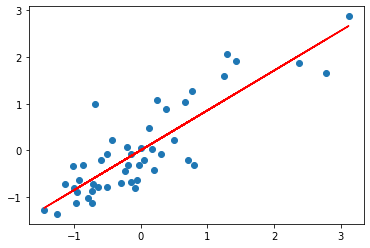

In [114]:
plt.scatter(size, y)
plt.plot(Xsize[:,1], g[0,1]*Xsize[:,1] + g[0,0], color = 'red')
plt.show()

In [115]:
finalCost = computeCost(Xsize,y,g)
print(finalCost)

0.13163644716432193


Text(0.5, 1.0, 'Error vs. Training Epoch')

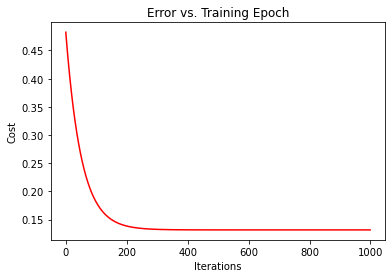

In [116]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

### **Initial values for theta variation**
We can do this again but changing the theta values and see how it affects our prediction and if it still converges. Let's use the theta values we obtained in the previous try.

[[-1.11299858e-16  8.54987590e-01]]


Text(0.5, 1.0, 'Error vs. Training Epoch')

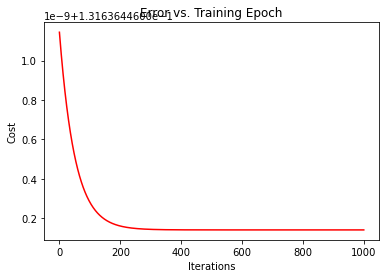

In [117]:
alpha = 0.01
iters = 1000
theta2 = g

g1,cost = gradientDescent(Xsize,y,theta2,iters,alpha)
print(g1)
finalCost = computeCost(Xsize,y,g1)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

As we can see if we put as initial values the thetas we obtain in the previous solution ([[-1.11299858e-16  8.54987590e-01]]). this solution converges immediately to the solution

 
### **Learning rate variation**
We can do this again but changing the learning rate and see how it affects our prediction and if it still converges

Text(0.5, 1.0, 'Error vs. Training Epoch')

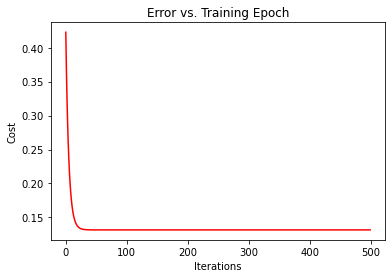

In [118]:
alpha = 0.1
iters = 500

g2,cost = gradientDescent(Xsize,y,theta,iters,alpha)
finalCost = computeCost(Xsize,y,g2)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

CChanging the learning rate makes the conversion faster if we increase alpha or slower if we decrease it

### **Number of iterations variation**

The las parameter we need to modify to see how the prediction behaves is the number of iterations. What we notice is that if the number of iterations is too low, the convergence might not be achieved, resulting in a wrongly predicted parameters. So this number should be high enough so that the convergence takes place. 

## **Prediction with bedroom variable**

In [119]:
theta1 = np.zeros([1,2])
g,cost = gradientDescent(Xbedroom,y,theta1,iters,alpha)
print(g)

[[-1.93462267e-16  4.42261117e-01]]


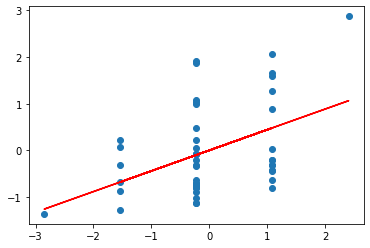

In [120]:
plt.scatter(bedroom, y)
plt.plot(Xbedroom[:,1], g[0,1]*Xbedroom[:,1] + g[0,0], color = 'red')
plt.show()

In [121]:
finalCost = computeCost(Xbedroom,y,g)
print(finalCost)

0.3936450510632275


Text(0.5, 1.0, 'Error vs. Training Epoch')

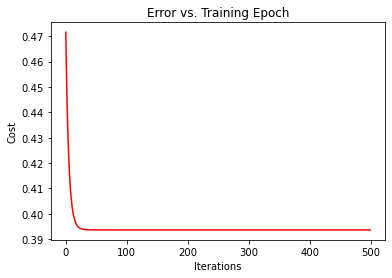

In [122]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

From now on, i will just tweek data and analyse the different problems i might encounter but I won't repeat myself in the explanation of the theory. 

# **MULTIVARIATE** -> home.csv 

Start by importing the neccessary libraries

In [123]:

# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading data and normalisation

In [124]:

my_data = pd.read_csv('home.csv',names=["size","bedroom","price"])

#we need to normalize the features using mean normalization
my_data = (my_data - my_data.mean())/my_data.std()

**Setting the matrixes:** We create the matriz "Xsize" and "Xbedroom" with all the inputs, where we adapt the code to run on a single variable, in this case "size". And a vector "y" with all the outputs. For convenience of the notation we create a vector of "ones" that we will define as x0 = 1.


In [125]:


#setting the matrixes
Xmultivariate = my_data.iloc[:,0:2]
ones = np.ones([Xmultivariate.shape[0],1])
Xmultivariate = np.concatenate((ones,Xmultivariate),axis=1)

Ymultivariate = my_data.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

## Computing cost and gradient decent functions

In [126]:

#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost


Setting hyper parameters

In [127]:

#set hyper parameters
alpha = 0.01
iters = 1000

[[-1.03191687e-16  8.78503652e-01 -4.69166570e-02]]
0.13070336960771892


Text(0.5, 1.0, 'Error vs. Training Epoch')

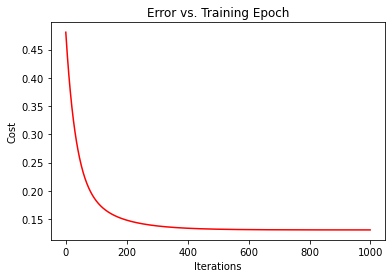

In [128]:

Gmultivariate,cost = gradientDescent(Xmultivariate,Ymultivariate,theta,iters,alpha)
print(Gmultivariate)

finalCost = computeCost(Xmultivariate,Ymultivariate,Gmultivariate)
print(finalCost)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

# **UNIVARIATE** -> data.csv

Importing neccessary libraries

In [129]:

# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Loading dataset. Important to notince we do not have a header row!!

In [130]:

data = pd.read_csv('data.csv', header = None)

#we need to normalize the features using mean normalization
data = (data - data.mean())/data.std()
data.head()

,0,1
0,-1.688421,-2.462936
1,0.458474,-0.237568
2,1.289917,-0.610671
3,-0.152128,-0.071341
4,1.113733,0.870195


In [131]:
#setting the matrixes
Xdat = data.iloc[:, 0:1]
my_x = data.iloc[:, 0:1].values
ones = np.ones([Xdat.shape[0], 1])
Xdat = np.concatenate((ones,Xdat),axis=1)

Ydat = data.iloc[:,1:2].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,2])


Plotting the data against the prediction (y)

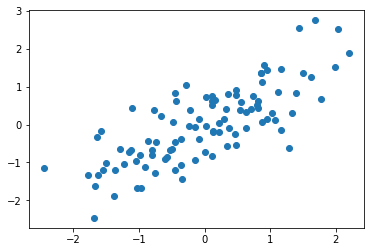

In [132]:
plt.scatter(my_x, Ydat)
plt.show()

In [133]:

#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost


In [134]:

#set hyper parameters
alpha = 0.01
iters = 1000
 

[[2.73560063e-15 7.73691547e-01]]
0.19866538386429497


Text(0.5, 1.0, 'Error vs. Training Epoch')

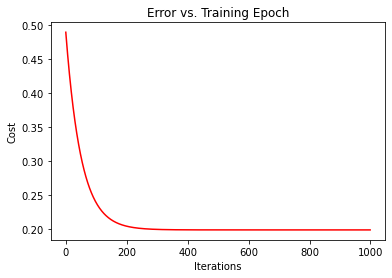

In [135]:
Gdat,cost = gradientDescent(Xdat,Ydat,theta,iters,alpha)
print(Gdat)

finalCost = computeCost(Xdat,Ydat,Gdat)
print(finalCost)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

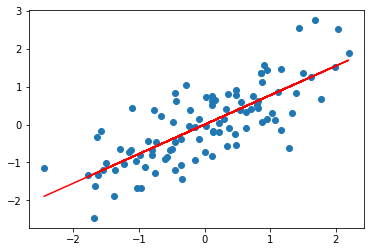

In [136]:
plt.scatter(my_x, Ydat)
plt.plot(Xdat[:,1], Gdat[0,1]*Xdat[:,1] + Gdat[0,0], color = 'red')
plt.show()

As we can see the prediction follows an aproximation of the scattered plot.